In [7]:
import os, pathlib

#choosing payoffs with the following constraints
#S < P < R < T and 2R > T + S 
#where R  = cc, S = cd, T = dc, P = dd with c = cooperation and d is defect
S, P, R, T = 1, 2, 3, 4
assert S < P < R < T
assert 2 * R > T + S

P, R

(2, 3)

In [8]:
#choosing strategies i.e choosing alpha, beta, gammas 
#we consider only Zero Determinant Strategies so 
#-1/P <= alpha + beta <= -1/R
#alpha >= -1
#alpha + beta = -1/Z for P <= Z <= R

def create_strat(alpha, Z):
    assert P <= Z <= R
    assert alpha >= -1
    return (alpha, -1 * (alpha + 1/Z))

(alpha0, Z0) = (1/4, 2.1343215)
(alpha1, Z1) = (-1/4, 2.828492)
(alpha2, Z2) = (1, 2.712)

parm = [(alpha0, Z0), (alpha1, Z1), (alpha2, Z2)]

strats = [ create_strat(alpha0, Z0), create_strat(alpha1, Z1), create_strat(alpha2, Z2) ] #with IC = [12,12,102]
# strats = [(1/4, beta(1/4, 2.6343215)), (-1/4, beta(-1/4, 2.91)), (1, beta(1, 2.312))] 
#might be bug: should be in fact strat 0 wins
# strats = [(-1/4, beta(-1/4, 2.1343215)), (-1/4, beta(-1/4, 2.828492)), (-1/5, beta(-1/5, 2.712))] #tuples are (alpha, beta)
# strats = [(-0.1, beta(-0.1, 2.1343215)), (0.2, beta(0.2, 2.828492)), (0.1, beta(0.1, 2.7))] #tuples are (alpha, beta)
strats

[(1/4, -0.718532974062249), (-1/4, -0.103545281372548), (1, -1.36873156342183)]

In [9]:
populations = [12, 12, 102] 
total = sum(populations)
pi = [pop/total for pop in populations] #initial conditions

In [10]:
#calculate payoffs sx, sy when player X with strat1 plays player Y with strat2
def calculate_payoff(strat1, strat2): 
    alpha, beta, a, b = strat1[0], strat1[1], strat2[0], strat2[1]
    D = beta * b - alpha * a #Determinant
    sx = 1/D * (a - beta) 
    sy = 1/D * (alpha - b)
    return (sx, sy)

def create_game_matrix(strats): 
    A = matrix(RR, 3, 3) #initialize an identity matrix
    for i in range(len(strats)): 
        for j in range(i, len(strats)): 
            sx, sy = calculate_payoff(strats[i], strats[j])
            # print(i, j, sx, sy)
            A[i, j] = sx
            A[j, i] = sy
    return A

A = create_game_matrix(strats)
A

[2.13432150000000 3.42242937816363 2.34298941637632]
[2.58249434824149 2.82849200000000 2.81713784890363]
[2.20692356695756 2.85590549230468 2.71200000000000]

[-((2.13432150000000*pi_0 + 3.42242937816363*pi_1 + 2.34298941637632*pi_2)*pi_0 + (2.58249434824149*pi_0 + 2.82849200000000*pi_1 + 2.81713784890363*pi_2)*pi_1 + (2.20692356695756*pi_0 + 2.85590549230468*pi_1 + 2.71200000000000*pi_2)*pi_2 - 2.13432150000000*pi_0 - 3.42242937816363*pi_1 - 2.34298941637632*pi_2)*pi_0, -((2.13432150000000*pi_0 + 3.42242937816363*pi_1 + 2.34298941637632*pi_2)*pi_0 + (2.58249434824149*pi_0 + 2.82849200000000*pi_1 + 2.81713784890363*pi_2)*pi_1 + (2.20692356695756*pi_0 + 2.85590549230468*pi_1 + 2.71200000000000*pi_2)*pi_2 - 2.58249434824149*pi_0 - 2.82849200000000*pi_1 - 2.81713784890363*pi_2)*pi_1, -((2.13432150000000*pi_0 + 3.42242937816363*pi_1 + 2.34298941637632*pi_2)*pi_0 + (2.58249434824149*pi_0 + 2.82849200000000*pi_1 + 2.81713784890363*pi_2)*pi_1 + (2.20692356695756*pi_0 + 2.85590549230468*pi_1 + 2.71200000000000*pi_2)*pi_2 - 2.20692356695756*pi_0 - 2.85590549230468*pi_1 - 2.71200000000000*pi_2)*pi_2] [2/21, 2/21, 17/21]


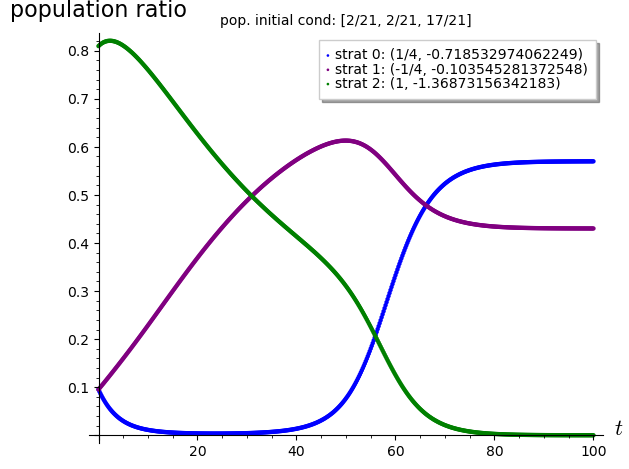

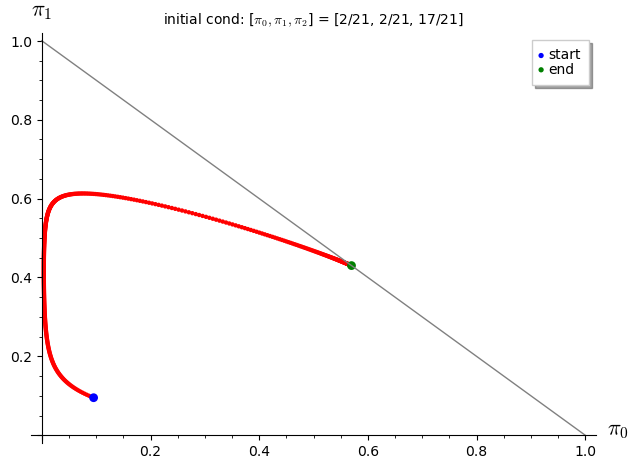

In [11]:
t = var('t') 

pi_var = vector(var("pi_0, pi_1, pi_2"))

A_i_pi = list()
for i in range(3): 
    A_i_pi.append(pi_var.dot_product(A[i]))
    
A_pi_pi = pi_var.dot_product(vector(A_i_pi))

de_system = list()

for i in range(3):
    de_system.append( pi_var[i] * (A_i_pi[i] - A_pi_pi) )
    
print(de_system, pi) 
    
soln = desolve_system_rk4(de_system, pi_var, ivar = t, ics = [0] + pi, step = .2, end_points=100)
#2D list with each 1D list of form [t, de1, de2, de3, ... deN]

# print(soln)
strat0 = [[i,j] for i,j,k,l in soln]
strat1 = [[i,k] for i,j,k,l in soln]
strat2 = [[i,l] for i,j,k,l in soln]
flow = [[j,k] for i,j,k,l in soln]

legend = lambda num, strat: "strat " + str(num) + ": " + str(strat)
LP1 = list_plot(strat0, color = "blue", legend_label= legend(0, strats[0]), title="pop. initial cond: " + str(pi))
LP2 = list_plot(strat1, color = "purple", legend_label= legend(1, strats[1]))
LP3 = list_plot(strat2, color = "green", legend_label= legend(2, strats[2]))
Plot = LP1 + LP2 + LP3
Plot.axes_labels(["$t$", "population ratio"])
Plot.show()#title = "pop. initial cond: " + str(pi))

Flow = list_plot(flow, color="red") + points([flow[0]], color="blue", size = "40", legend_label="start") + points([flow[-1]], color="green", size = "40", legend_label="end")
Flow_plot = Flow + plot(1 - x, 0, 1, color = "grey")
Flow_plot.axes_labels([r"$\pi_0$", r"$\pi_1$"])
Flow_plot.show(title = r"initial cond: [$\pi_0, \pi_1, \pi_2$] = " + str(pi))

folder_name = "example"
folder = pathlib.Path(folder_name)
folder = folder.resolve()
folder.mkdir()
# os.mkdir(folder)
Plot.save(str(folder) + "/time.png")
Flow_plot.save(str(folder) + "/flow.png") 

# pi_var[0] * (A_i_pi[0] - A_pi_pi)
# plot_slope_field(pi_var[0] * (A_i_pi[0] - A_pi_pi), (t, 0, 5), (pi_0, 0, 10))